# Matplotlib [A-Z]

In [5]:
import numpy as np  # matplotlib foi feito para trabalhar com numpy
import matplotlib.pyplot as plt

<div align="center">
    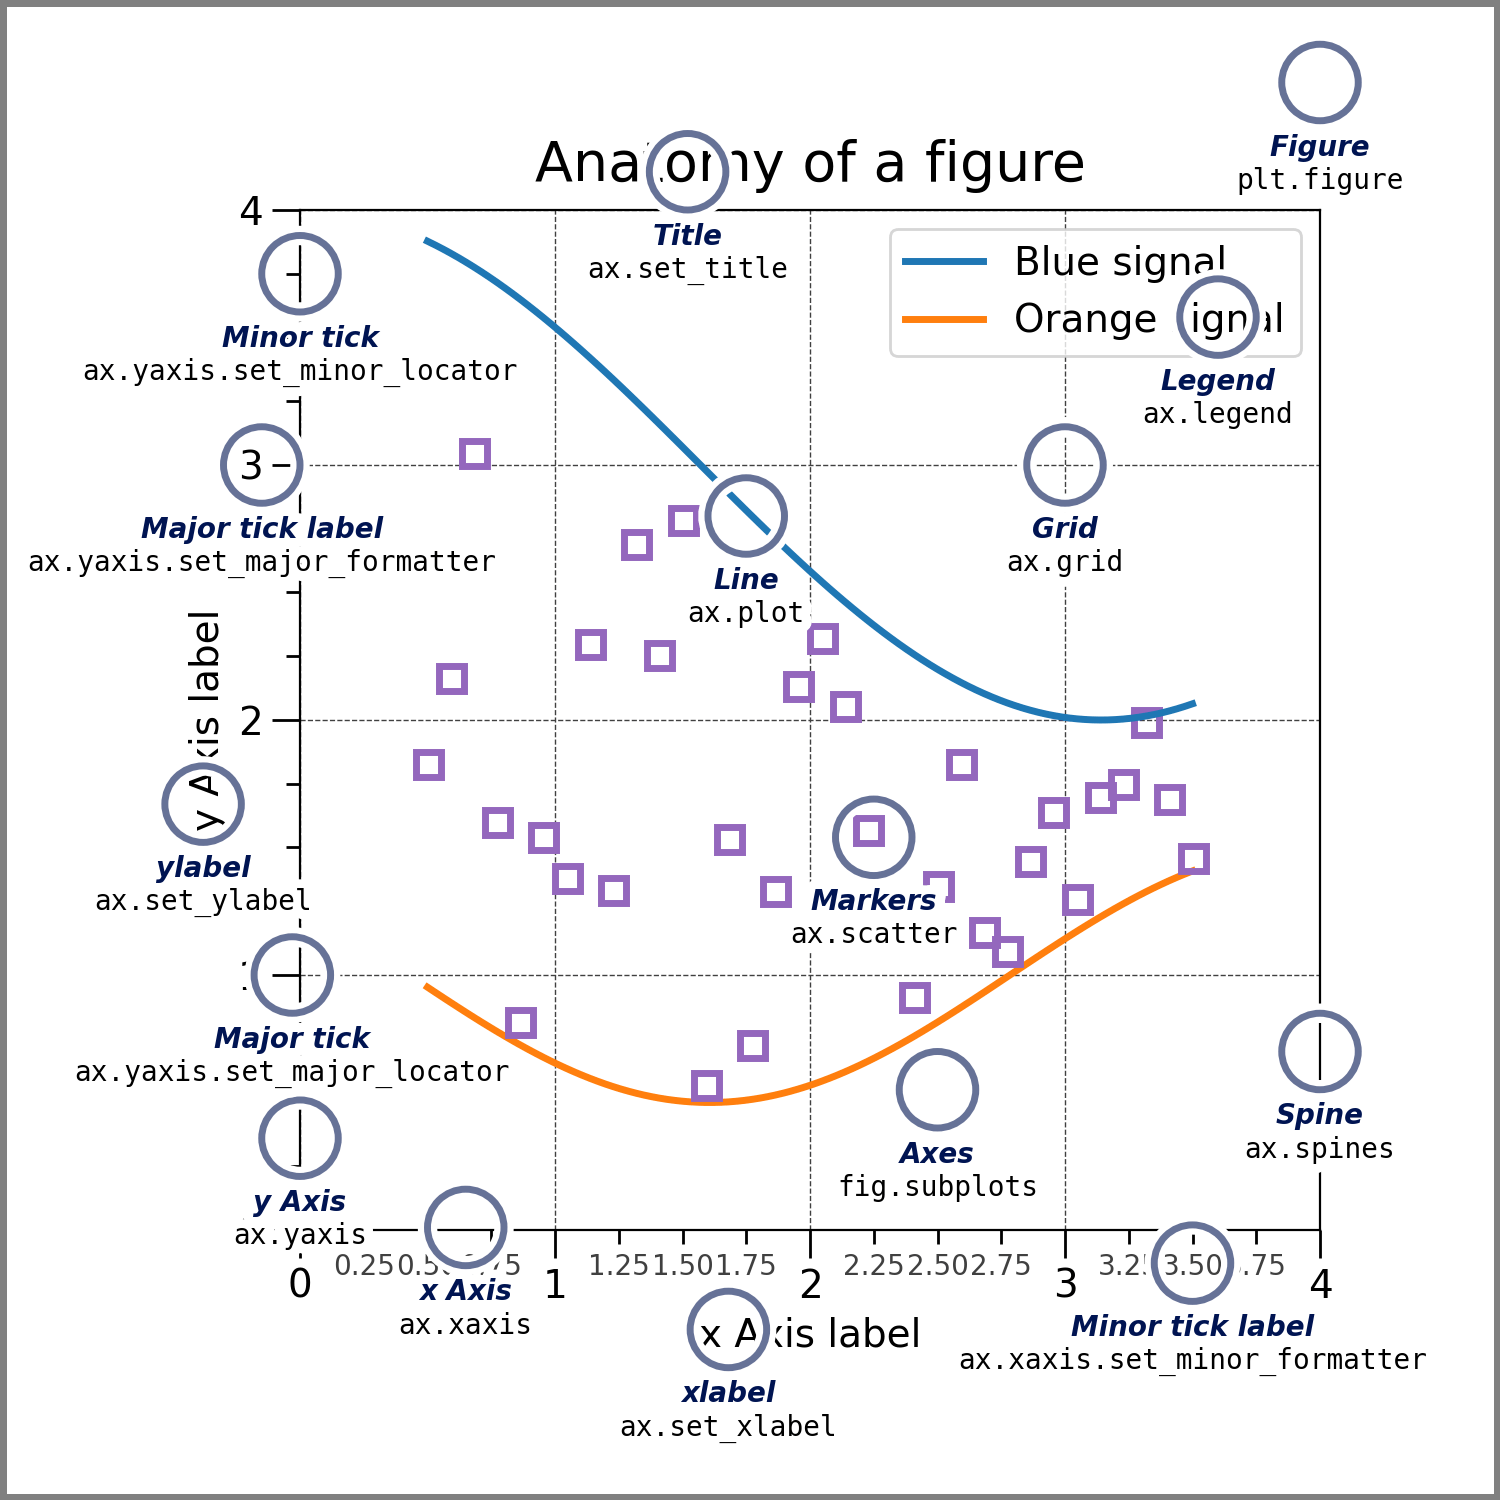
</div>

```python
fig = plt.figure()             # an empty figure with no Axes
fig, ax = plt.subplots()       # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
# a figure with one Axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([['left', 'right_top'],
                               ['left', 'right_bottom']])
```                          

## Colors
<div align="center">
    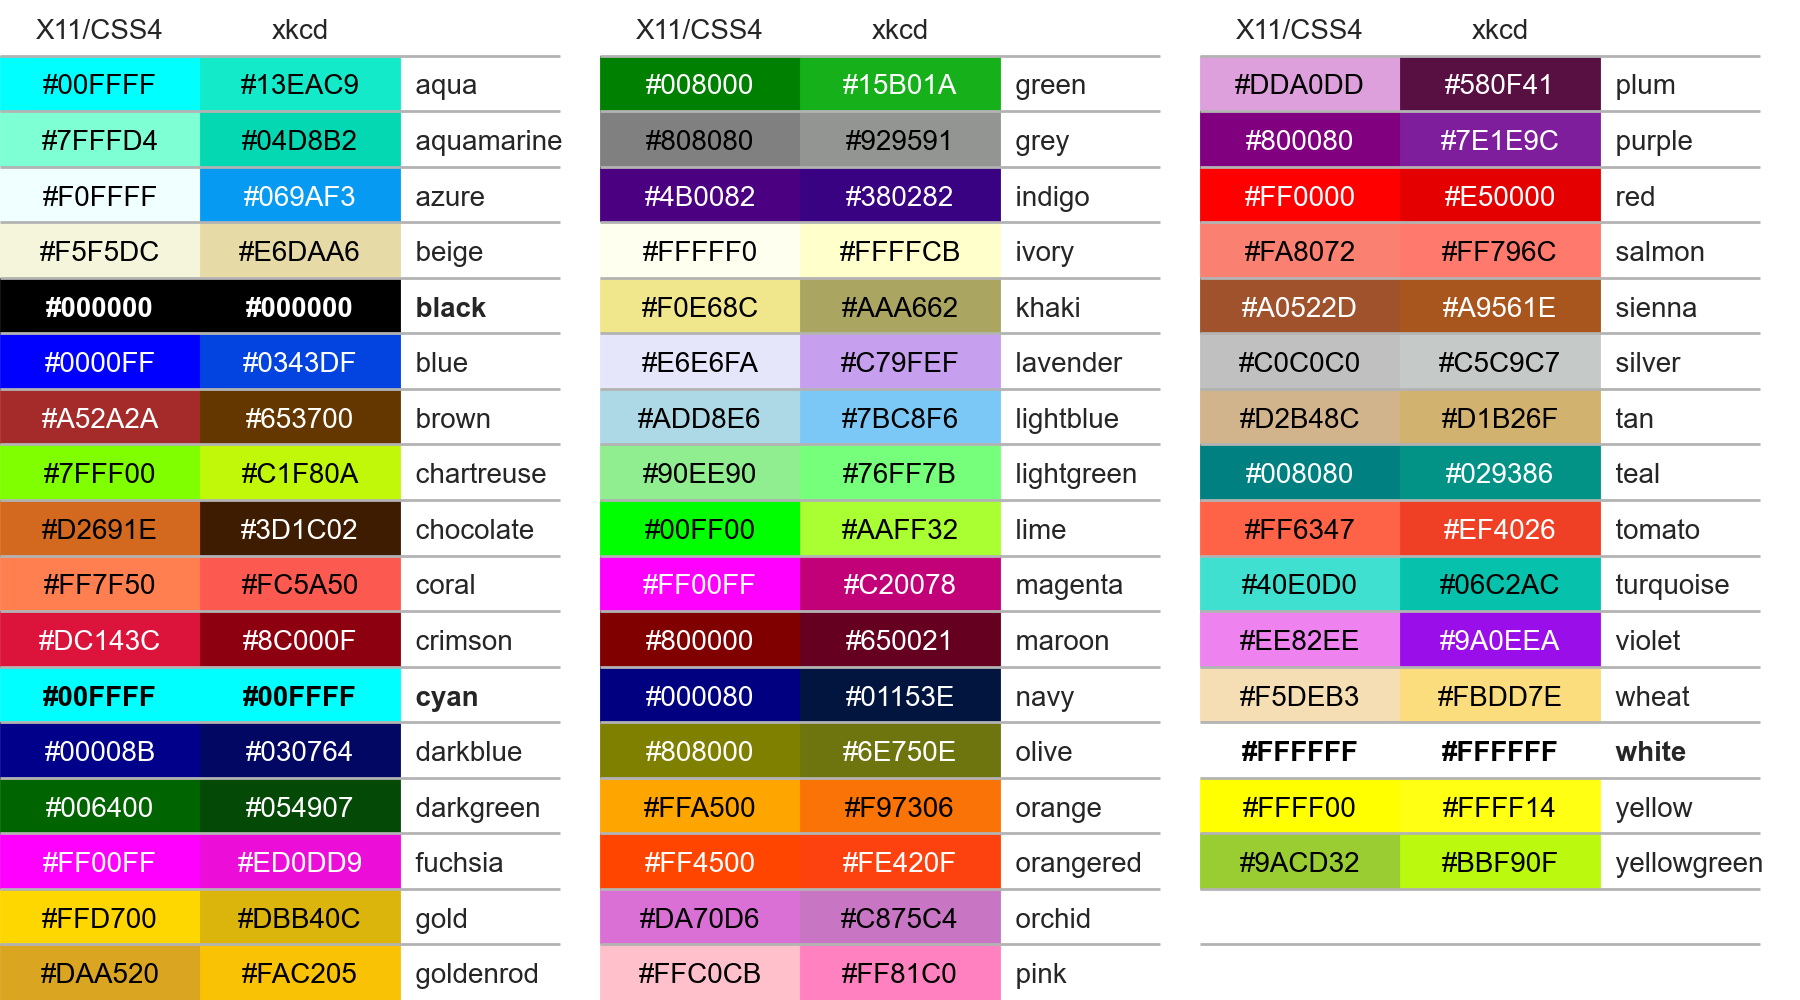
</div>

In [5]:
fig = plt.figure()
plt.show()

<Figure size 640x480 with 0 Axes>

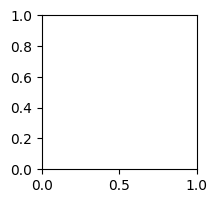

In [7]:
fig, ax = plt.subplots(figsize=(2,2)) 
plt.show()

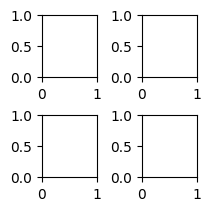

In [10]:
fig, axs = plt.subplots(
    ncols=2, 
    nrows=2, 
    layout='constrained',  # -> It's plt.tight_layout() but easier
    figsize=(2,2)) 
plt.show()

## Axes & Axis

A diferença entre Axes e Axis está no escopo dentro de um gráfico no Matplotlib:

`Axes` (plural de axis) é a área onde os dados são plotados. Um objeto Axes contém os eixos x e y (ou x, y e z no caso de gráficos 3D), os rótulos dos eixos, um título e a grade do gráfico.

`Axis` refere-se a um único eixo dentro do Axes. Ele controla a escala, os limites, os ticks (marcas) e os tick labels (rótulos das marcas) para um determinado eixo.

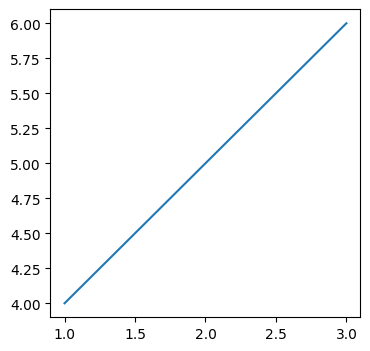

In [14]:
fig, ax = plt.subplots(figsize=(4, 4))  # Cria um objeto Axes dentro de Figure
ax.plot([1, 2, 3], [4, 5, 6])  # Adiciona um gráfico ao Axes
plt.show()

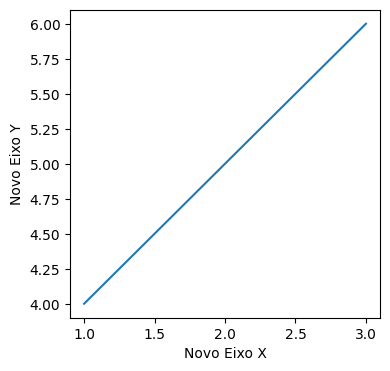

In [15]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot([1, 2, 3], [4, 5, 6])

ax.set_xlabel("Eixo X")  # Define o rótulo do eixo X
ax.set_ylabel("Eixo Y")  # Define o rótulo do eixo Y

ax.xaxis.set_label_text("Novo Eixo X")  # Outra forma de mudar o rótulo do eixo X
ax.yaxis.set_label_text("Novo Eixo Y")  # Outra forma de mudar o rótulo do eixo Y

plt.show()

## Explicit Interface
- fig e axes são explicitos

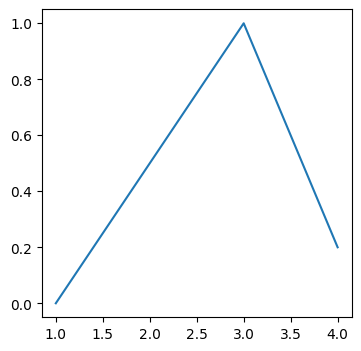

In [23]:
fig = plt.figure(figsize=(4, 4))
ax = fig.subplots()
ax.plot([1, 2, 3, 4], [0, 0.5, 1, 0.2])

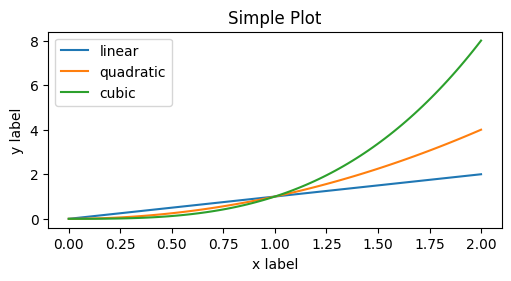

In [29]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the Axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the Axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the Axes.
ax.set_ylabel('y label')  # Add a y-label to the Axes.
ax.set_title("Simple Plot")  # Add a title to the Axes.
ax.legend()  # Add a legend.
plt.show()

## Implicit interface
- fig e axes são implicitos

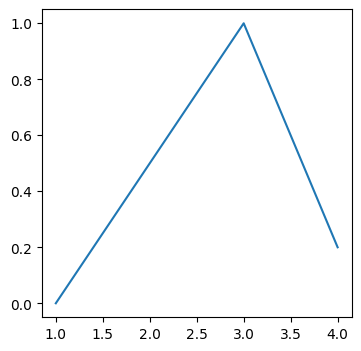

In [27]:
plt.figure(figsize=(4, 4))
plt.plot([1, 2, 3, 4], [0, 0.5, 1, 0.2])

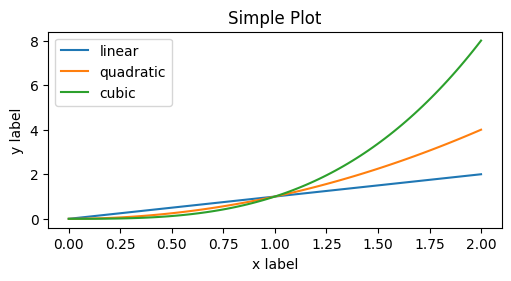

In [31]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) Axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()
plt.show()

## Making a helper functions

If you need to make the same plots over and over again with different data sets, or want to easily wrap Matplotlib methods, use the recommended signature function below.

```python
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out
```
which you would then use twice to populate two subplots:
```python
data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})
```

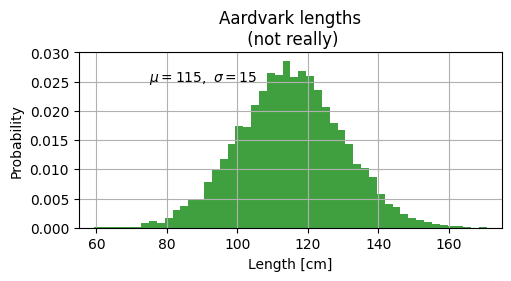

In [33]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='green', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True)

`facecolor`: Usado para definir a cor de preenchimento de objetos com áreas internas (como barras de histograma, áreas ou boxes).

`c`: Usado para definir a cor de elementos como linhas ou pontos em gráficos (ex. dispersão, gráficos de linha).

## Scales

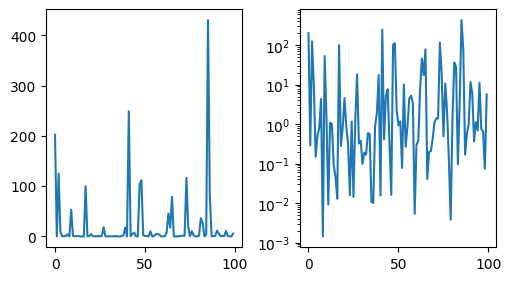

In [36]:
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout='constrained')
xdata = np.arange(100)  # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data)

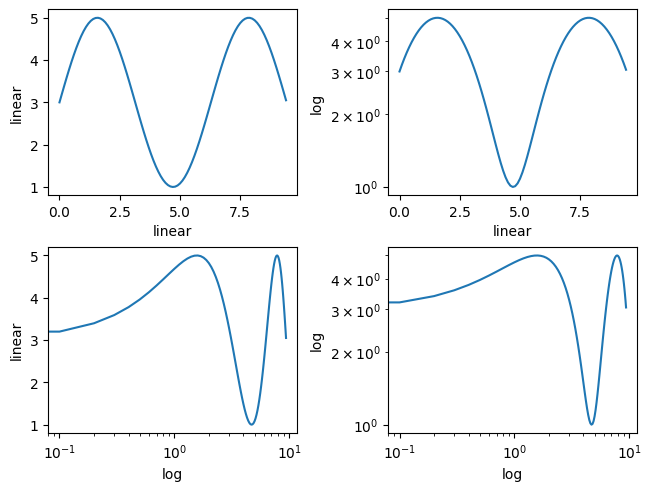

In [50]:
import matplotlib.scale as mscale
from matplotlib.ticker import FixedLocator, NullFormatter

fig, axs = plt.subplot_mosaic([['linear', 'linear-log'],
                               ['log-linear', 'log-log']], layout='constrained')

x = np.arange(0, 3*np.pi, 0.1)
y = 2 * np.sin(x) + 3

ax = axs['linear']
ax.plot(x, y)
ax.set_xlabel('linear')
ax.set_ylabel('linear')

ax = axs['linear-log']
ax.plot(x, y)
ax.set_yscale('log')
ax.set_xlabel('linear')
ax.set_ylabel('log')

ax = axs['log-linear']
ax.plot(x, y)
ax.set_xscale('log')
ax.set_xlabel('log')
ax.set_ylabel('linear')

ax = axs['log-log']
ax.plot(x, y)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('log')
ax.set_ylabel('log');

## Tick locators and formatters

Text(0.5, 1.0, 'Manual ticks')

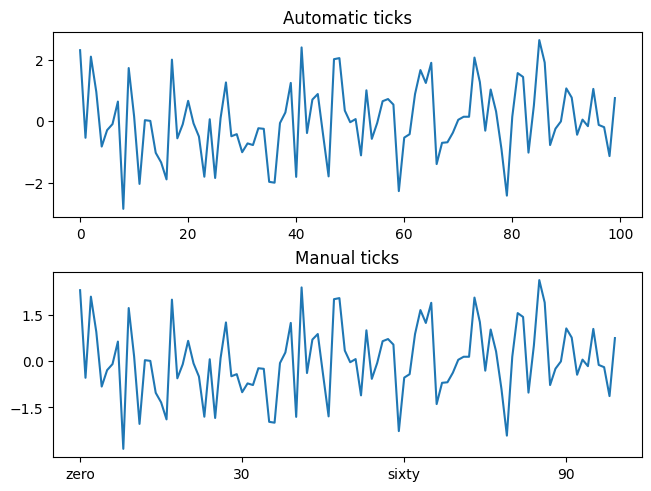

In [38]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title('Manual ticks')

## Plotting dates and strings

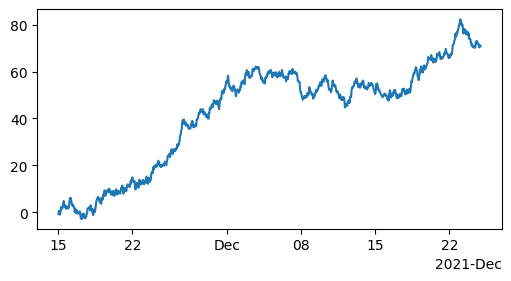

In [39]:
from matplotlib.dates import ConciseDateFormatter

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                  np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
ax.xaxis.set_major_formatter(ConciseDateFormatter(ax.xaxis.get_major_locator()))

## Color mapped data

Text(0.5, 1.0, 'scatter()')

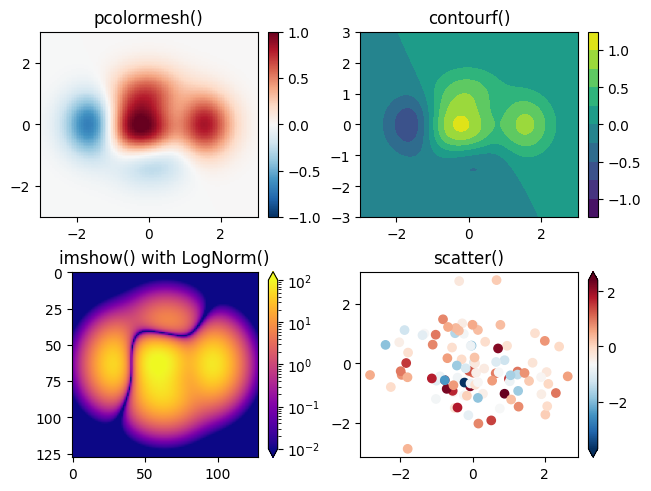

In [46]:
from matplotlib.colors import LogNorm

X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, layout='constrained')
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma', norm=LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()')

## Working with multiple Figures and Axes

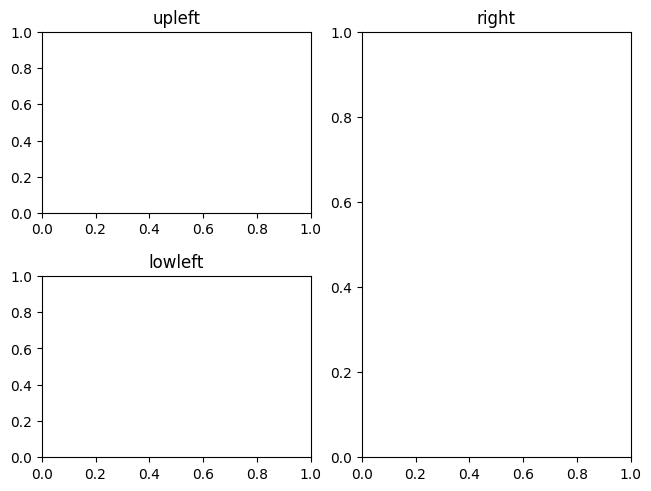

In [49]:
fig, axd = plt.subplot_mosaic(
    [
        ['upleft', 'right'],
        ['lowleft', 'right']
    ], layout='constrained'
)
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right');

## Temporary styling

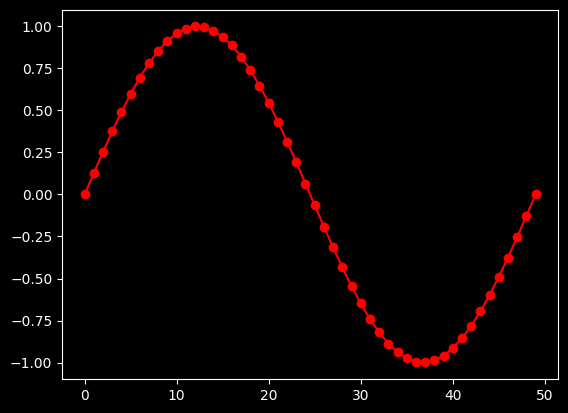

In [51]:
with plt.style.context('dark_background'):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')
plt.show()

## Cmap (color map)

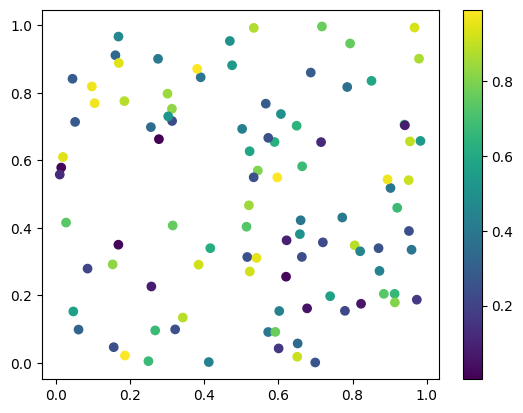

In [52]:
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)  # Valores que serão mapeados para cores

plt.scatter(x, y, c=z, cmap='viridis')  # 'c' define os dados que controlam as cores
plt.colorbar()  # Adiciona a barra de cores
plt.show()

In [55]:
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            layout='constrained', squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

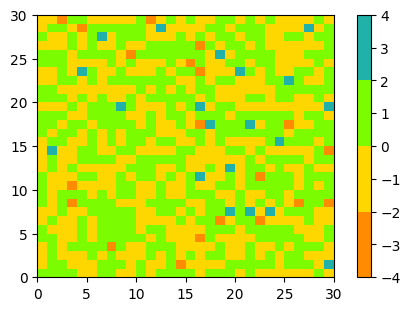

In [56]:
cmap = ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen"])
plot_examples([cmap])

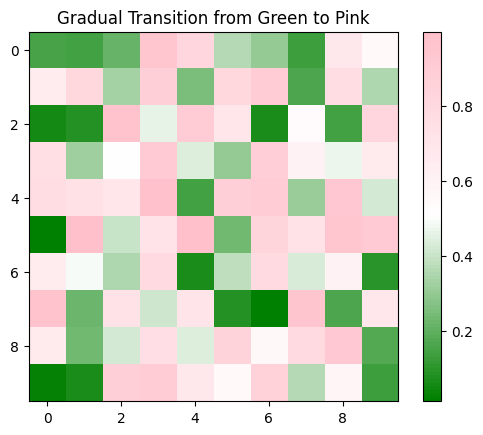

In [59]:
import matplotlib.colors as mcolors
# Create a custom colormap
colors = ["green", "white", "pink"]
n_bins = 100  # Number of bins to create smooth transitions
cmap_name = "green_white_pink"
cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Generate some data to visualize
data = np.random.rand(10, 10)  # Example data

# Plot the data with the custom colormap
plt.imshow(data, cmap=cm)
plt.colorbar()  # Optional: adds a color bar to the plot
plt.title("Gradual Transition from Green to Pink")
plt.show()

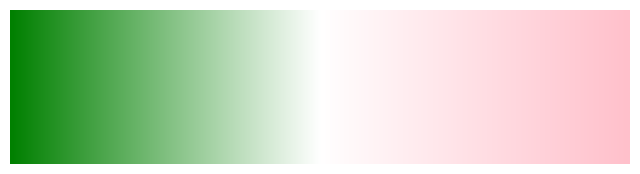

In [61]:
# Create gradient data
gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack((gradient, gradient))

# Define color transition points (green -> white -> pink)
colors = [(0.0, 'green'),   # Start with green at 0.0
          (0.5, 'white'),   # Transition to white at 0.5
          (1.0, 'pink')]    # End with pink at 1.0

# Create colormap
custom_cmap = LinearSegmentedColormap.from_list('green_white_pink', colors)

# Display the gradient
fig, ax = plt.subplots(figsize=(8, 2))
ax.imshow(gradient, aspect='auto', cmap=custom_cmap)
ax.set_axis_off()
plt.show()

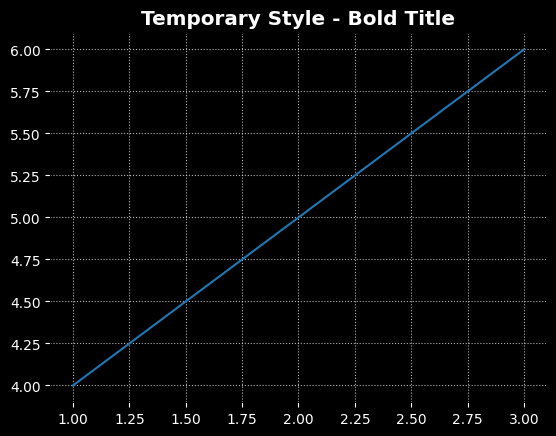

In [67]:
from matplotlib import rc_context
# Define your style
custom_style = {
    'axes.grid': True,
    'grid.linestyle': ':',
    'grid.alpha': 0.7,
    'figure.facecolor': 'black',
    'axes.facecolor': 'black',
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'axes.titleweight': 'bold'
}
# Use the style only within this context
with rc_context(custom_style):
    plt.figure()
    plt.plot([1, 2, 3], [4, 5, 6])
    plt.title('Temporary Style - Bold Title')
    plt.grid(True)
    plt.show()

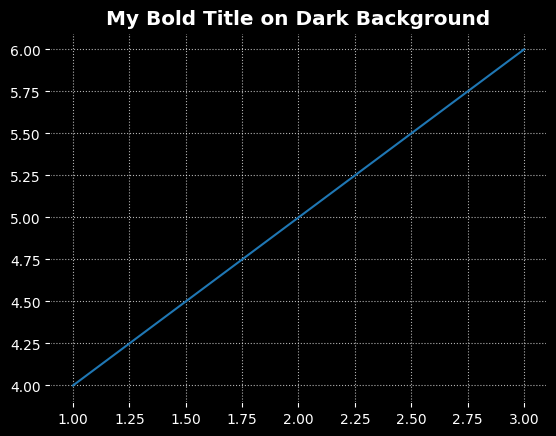

In [69]:
# Set global style parameters
plt.rcParams.update({
    'axes.grid': True,          # Enable grid
    'grid.linestyle': ':',      # Dotted grid lines
    'grid.alpha': 0.7,          # Slightly transparent grid
    'figure.facecolor': 'black', # Dark figure background
    'axes.facecolor': 'black',  # Dark axes background
    'text.color': 'white',      # White text
    'axes.labelcolor': 'white', # White axis labels
    'xtick.color': 'white',     # White x-ticks
    'ytick.color': 'white',     # White y-ticks
    'axes.titleweight': 'bold'  # Bold titles
})

# Example plot
plt.figure()
plt.plot([1, 2, 3], [4, 5, 6])
plt.title('My Bold Title on Dark Background')
plt.grid(True)  # Ensure grid is on (though rcParams already set this)
plt.show()

# Ticks

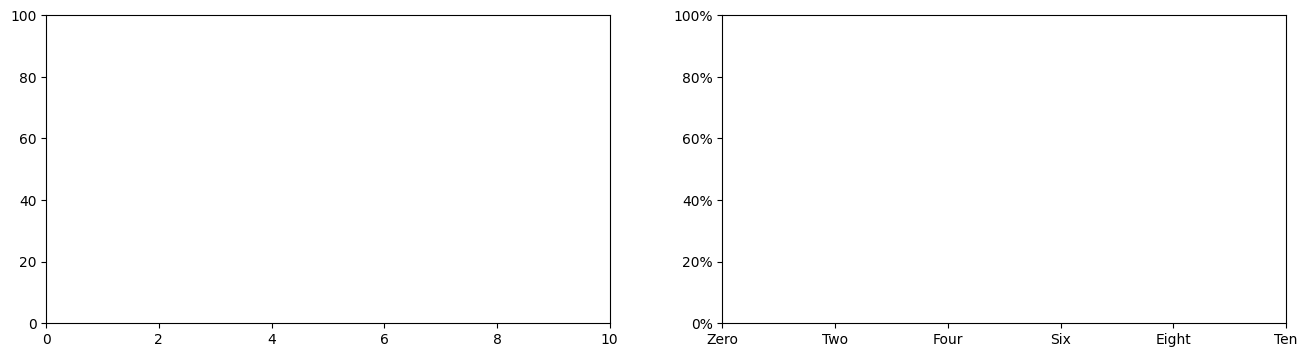

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].set_xlim(0, 10)
ax[0].set_ylim(0, 100)

ax[1].set_xlim(0, 10)
ax[1].set_ylim(0, 100)

ax[1].set_xticks([0, 2, 4, 6, 8, 10])
ax[1].set_yticks([0, 20, 40, 60, 80, 100])

# Use set_xticklabels -> após setar os ticks com set_xticks 
ax[1].set_xticklabels(['Zero', 'Two', 'Four', 'Six', 'Eight', 'Ten'])
ax[1].set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

plt.show()

Mas qual é a diferença entre o *ticks* e o *ticklabels*?

✅ **ticks (marcadores)**  
São as posições numéricas ao longo dos eixos onde você quer que apareçam os valores ou rótulos.
- Pense neles como os "pauzinhos" (ou "sticks") que marcam um ponto no eixo.
- Eles indicam onde alguma informação será mostrada no eixo (mesmo que sem texto)
```python
ax.set_xticks([0, 2, 4, 6, 8, 10])  # Isso define que haverá marcas nesses pontos ao longo do eixo X.
```

✅ **ticklabels (rótulos dos marcadores)**  
São os textos que aparecem ao lado dos ticks. Eles representam o que será mostrado como rótulo em cada uma das posições dos ticks.
```python
ax.set_xticklabels(['Zero', 'Dois', 'Quatro', 'Seis', 'Oito', 'Dez'])  # Isso define que os ticks definidos anteriormente terão esses rótulos personalizados.
```